In [ ]:
from google.colab import drive
import pandas as pd
import gensim
from gensim.models import Word2Vec
import os
import re
import regex
import warnings
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#during the experiment I felt ..

During the experiment, I felt... [Confident]	During the experiment, I felt... [Creative]	During the experiment, I felt... [Confused]	During the experiment, I felt... [Guided towards a good solution]	During the experiment, I felt... [Productive]	During the experiment, I felt... [#]


### On request

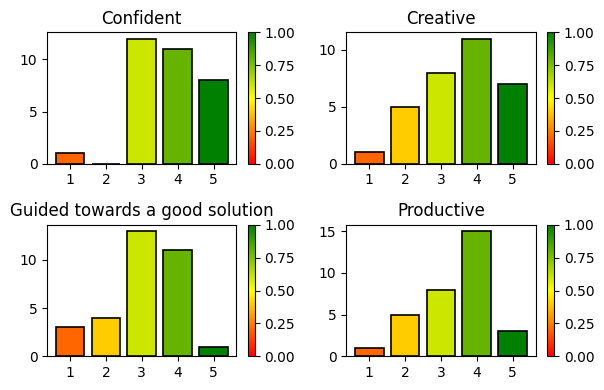

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap

# Updated list of Likert scale response lists, excluding the third and sixth
response_lists = [
    [1, 5, 4, 3, 3, 5, 4, 4, 4, 3, 5, 4, 5, 4, 3, 4, 4, 3, 5, 3, 4, 5, 3, 3, 5, 3, 4, 4, 3, 3, 3, 5],
    [1, 4, 4, 2, 2, 5, 3, 3, 4, 5, 4, 2, 4, 3, 5, 4, 3, 2, 2, 5, 3, 5, 4, 4, 4, 4, 4, 3, 3, 3, 5, 5],
    [1, 4, 4, 2, 3, 4, 3, 3, 3, 4, 3, 1, 4, 4, 5, 4, 2, 4, 1, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 2, 3, 3],
    [1, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 5, 4, 5, 4, 3, 2, 2, 3, 3, 5, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4]
]

# Updated titles, excluding the third and sixth
titles = ['Confident', 'Creative', 'Guided towards a good solution', 'Productive']

# Likert scale labels
likert_scale_labels = ['1', '2', '3', '4', '5']

# Create a green to red color map
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Updated colormap dictionary for the remaining titles
cmap_dict = {
    'Confident': cmap_positive,
    'Creative': cmap_positive,
    'Guided towards a good solution': cmap_positive,
    'Productive': cmap_positive
}

# Create subplots with 2 rows and 2 columns, adjusted for the new number of plots
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    response_list = response_lists[i]
    frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]

    # Map colors based on Likert scale value and attribute positivity/negativity
    cmap = cmap_dict[titles[i]]
    bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(value/5) for value in range(1, 6)], edgecolor='black', linewidth=1.2)
    ax.set_title(titles[i])

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-duringExp.pdf')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.2% of the points cannot be placed

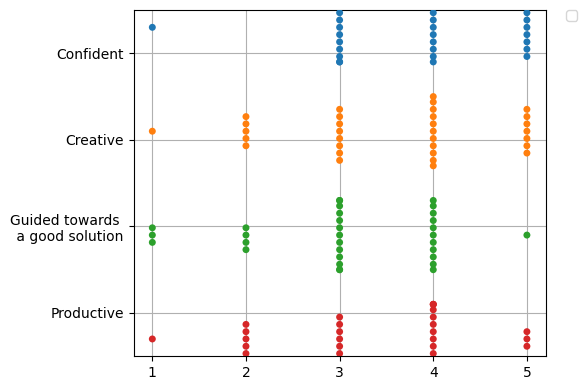

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Provided Likert scale responses and corresponding categories
# Adjusting the category name for line break
categories = ['Confident', 'Creative', 'Guided towards \n a good solution', 'Productive']
response_lists = [
    [1, 5, 4, 3, 3, 5, 4, 4, 4, 3, 5, 4, 5, 4, 3, 4, 4, 3, 5, 3, 4, 5, 3, 3, 5, 3, 4, 4, 3, 3, 3, 5],
    [1, 4, 4, 2, 2, 5, 3, 3, 4, 5, 4, 2, 4, 3, 5, 4, 3, 2, 2, 5, 3, 5, 4, 4, 4, 4, 4, 3, 3, 3, 5, 5],
    [1, 4, 4, 2, 3, 4, 3, 3, 3, 4, 3, 1, 4, 4, 5, 4, 2, 4, 1, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 2, 3, 3],
    [1, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 5, 4, 5, 4, 3, 2, 2, 3, 3, 5, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4]
]

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form suitable for plotting
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', hue="Category", dodge=True)

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Move the legend outside of the plot
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-duringExp.pdf')
plt.show()


[0.9413228509270448, 1.1053389496206072, 0.9954533737723926, 0.981687158630159]
[3.78125, 3.5625, 3.09375, 3.4375]


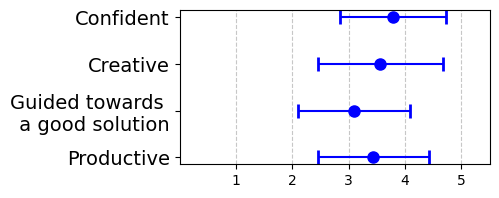

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories = ['Confident', 'Creative', 'Guided towards \n a good solution', 'Productive']
response_lists = [
    [1, 5, 4, 3, 3, 5, 4, 4, 4, 3, 5, 4, 5, 4, 3, 4, 4, 3, 5, 3, 4, 5, 3, 3, 5, 3, 4, 4, 3, 3, 3, 5],
    [1, 4, 4, 2, 2, 5, 3, 3, 4, 5, 4, 2, 4, 3, 5, 4, 3, 2, 2, 5, 3, 5, 4, 4, 4, 4, 4, 3, 3, 3, 5, 5],
    [1, 4, 4, 2, 3, 4, 3, 3, 3, 4, 3, 1, 4, 4, 5, 4, 2, 4, 1, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 2, 3, 3],
    [1, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 5, 4, 5, 4, 3, 2, 2, 3, 3, 5, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4]
]



# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation, degrees of freedom , unbias
print(stds)
print(means)
plt.figure(figsize=(4, 2))

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)
# Remove x-axis label for a cleaner look
plt.xlabel('')

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-duringExp.pdf', bbox_inches="tight")
# Show the plot
plt.show()


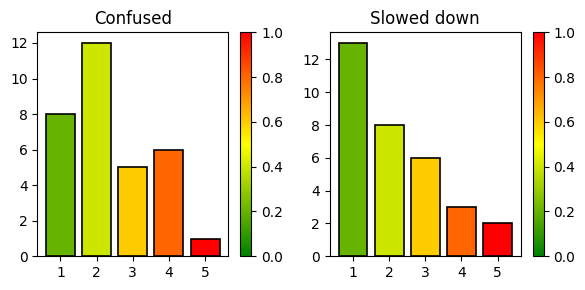

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap

# Updated List of Likert scale response lists to only include the third and sixth
response_lists = [
    [1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 5, 2, 2, 3, 2, 1, 4, 4, 4, 2, 2, 2, 2, 1, 1, 3, 3, 4, 4, 4, 1, 1],
    [1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 2, 1, 4, 4, 1, 1, 1, 2, 1, 2, 3, 3, 5, 4, 5, 3, 3],
]

# Updated titles to only include the third and sixth
titles = ['Confused', 'Slowed down']

# Color map setup remains the same
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Updated color map dictionary for the new titles
cmap_dict = {
    'Confused': cmap_negative,
    'Slowed down': cmap_negative
}

# Adjusted subplot layout for only two plots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # Adjusted for two horizontal plots

# Generate a plot for each of the remaining sets of Likert scale responses
for i, ax in enumerate(axes):
    response_list = response_lists[i]
    frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]

    # Map colors based on Likert scale value and attribute positivity/negativity
    cmap = cmap_dict[titles[i]]
    bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
    ax.set_title(titles[i])

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-duringExp-neg.pdf')
plt.show()


<ipython-input-96-5aba058ac59f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


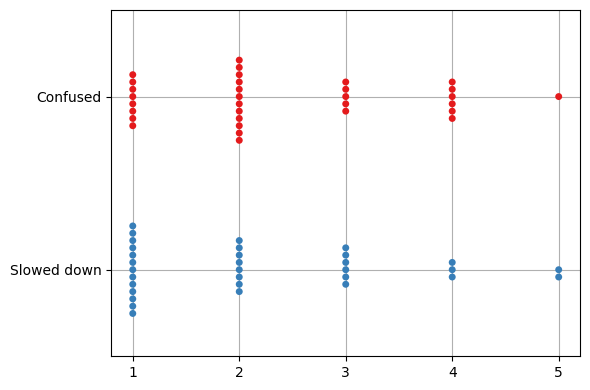

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Updated Likert scale responses and corresponding categories
titles = ['Confused', 'Slowed down']
response_lists = [
    [1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 5, 2, 2, 3, 2, 1, 4, 4, 4, 2, 2, 2, 2, 1, 1, 3, 3, 4, 4, 4, 1, 1],
    [1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 2, 1, 4, 4, 1, 1, 1, 2, 1, 2, 3, 3, 5, 4, 5, 3, 3],
]

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = titles

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(6, 4))  # This specifies the ticks at 1, 2, 3, 4, 5

plt.xticks(range(1, 6))
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-duringExp-neg.pdf')
plt.show()



[1.157026221578126, 1.2471742253538984]
[2.375, 2.15625]


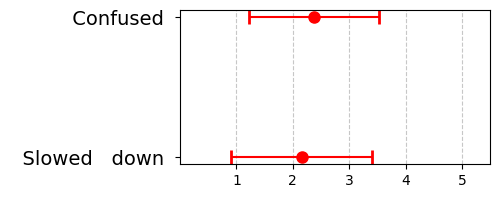

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories   = [' Confused ', '  Slowed   down ']
response_lists = [
    [1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 5, 2, 2, 3, 2, 1, 4, 4, 4, 2, 2, 2, 2, 1, 1, 3, 3, 4, 4, 4, 1, 1],
    [1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 2, 1, 4, 4, 1, 1, 1, 2, 1, 2, 3, 3, 5, 4, 5, 3, 3],
]


# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]
print(stds)
print(means)
# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)


# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-duringExp-neg.pdf', bbox_inches="tight")


# Show the plot
plt.show()


#### at End


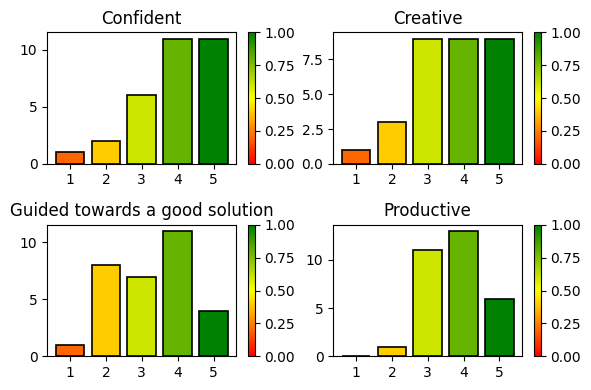

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [
    [5, 4, 3, 1, 5, 4, 2, 5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 3, 4, 3, 4, 3, 5, 4, 4, 3, 3, 2, 5, 5, 5],
    [5, 3, 2, 1, 5, 4, 3, 5, 3, 3, 3, 5, 3, 4, 4, 4, 4, 4, 3, 2, 3, 2, 5, 4, 5, 4, 3, 4, 5, 5, 5],
    [5, 4, 2, 2, 4, 4, 3, 4, 2, 5, 2, 4, 3, 5, 5, 2, 2, 3, 3, 1, 3, 3, 4, 4, 4, 2, 3, 2, 4, 4, 4],
    [5, 4, 3, 3, 5, 3, 2, 4, 4, 5, 3, 4, 4, 4, 4, 3, 3, 4, 4, 5, 3, 3, 5, 4, 4, 3, 4, 3, 3, 5, 4],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Confident', 'Creative', 'Guided towards a good solution', 'Productive']

# Create a green to red color map
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Confident': cmap_positive,
    'Creative': cmap_positive,
    'Confused': cmap_negative,
    'Guided towards a good solution': cmap_positive,
    'Productive': cmap_positive,
    'Slowed down': cmap_negative
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    response_list = response_lists[i]
    frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]

    # Map colors based on Likert scale value and attribute positivity/negativity
    cmap = cmap_dict[titles[i]]
    bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
    ax.set_title(titles[i])

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-duringExp.pdf')
plt.show()


<ipython-input-95-bfe3c9ee545c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/s

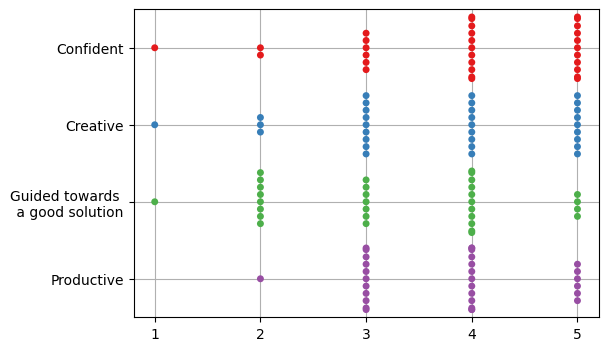

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories =  ['Confident', 'Creative', 'Guided towards \n a good solution', 'Productive']

response_lists = [
    [5, 4, 3, 1, 5, 4, 2, 5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 3, 4, 3, 4, 3, 5, 4, 4, 3, 3, 2, 5, 5, 5],
    [5, 3, 2, 1, 5, 4, 3, 5, 3, 3, 3, 5, 3, 4, 4, 4, 4, 4, 3, 2, 3, 2, 5, 4, 5, 4, 3, 4, 5, 5, 5],
    [5, 4, 2, 2, 4, 4, 3, 4, 2, 5, 2, 4, 3, 5, 5, 2, 2, 3, 3, 1, 3, 3, 4, 4, 4, 2, 3, 2, 4, 4, 4],
    [5, 4, 3, 3, 5, 3, 2, 4, 4, 5, 3, 4, 4, 4, 4, 3, 3, 4, 4, 5, 3, 3, 5, 4, 4, 3, 4, 3, 3, 5, 4],
]
# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-duringExp.pdf')
plt.show()


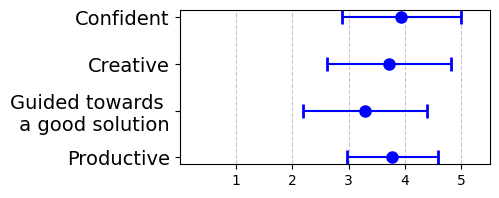

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories =  ['Confident', 'Creative', 'Guided towards \n a good solution', 'Productive']

response_lists = [
    [5, 4, 3, 1, 5, 4, 2, 5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 3, 4, 3, 4, 3, 5, 4, 4, 3, 3, 2, 5, 5, 5],
    [5, 3, 2, 1, 5, 4, 3, 5, 3, 3, 3, 5, 3, 4, 4, 4, 4, 4, 3, 2, 3, 2, 5, 4, 5, 4, 3, 4, 5, 5, 5],
    [5, 4, 2, 2, 4, 4, 3, 4, 2, 5, 2, 4, 3, 5, 5, 2, 2, 3, 3, 1, 3, 3, 4, 4, 4, 2, 3, 2, 4, 4, 4],
    [5, 4, 3, 3, 5, 3, 2, 4, 4, 5, 3, 4, 4, 4, 4, 3, 3, 4, 4, 5, 3, 3, 5, 4, 4, 3, 4, 3, 3, 5, 4],
]


# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-duringExp.pdf', bbox_inches="tight")


# Show the plot
plt.show()


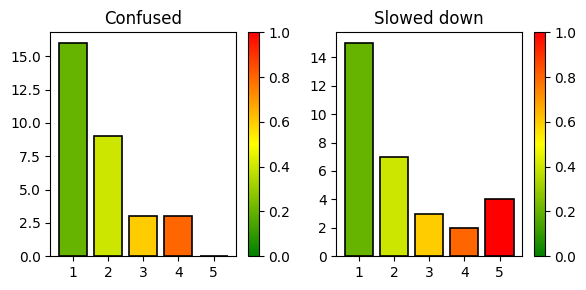

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [

    [2, 2, 1, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 2, 3, 2, 4, 2, 2, 1, 1, 3, 4, 1, 1, 1],

    [5, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 3, 3, 4, 5, 5, 5],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Confused', 'Slowed down']
# Create a green to red color map
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Confident': cmap_positive,
    'Creative': cmap_positive,
    'Confused': cmap_negative,
    'Guided towards a good solution': cmap_positive,
    'Productive': cmap_positive,
    'Slowed down': cmap_negative
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(6,3))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    response_list = response_lists[i]
    frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]

    # Map colors based on Likert scale value and attribute positivity/negativity
    cmap = cmap_dict[titles[i]]
    bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
    ax.set_title(titles[i])

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-duringExp-negative.pdf')
plt.show()


<ipython-input-94-bb9d15193146>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


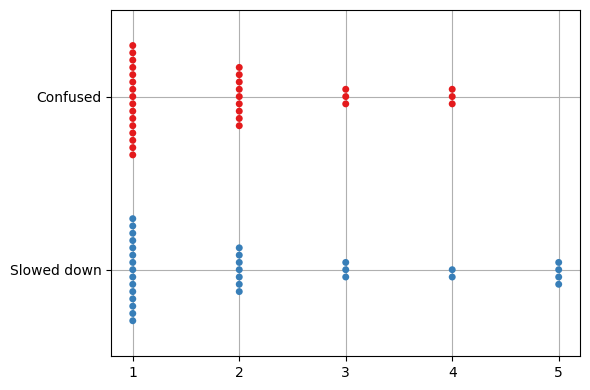

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses

response_lists = [

    [2, 2, 1, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 2, 3, 2, 4, 2, 2, 1, 1, 3, 4, 1, 1, 1],

    [5, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 3, 3, 4, 5, 5, 5],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Confused', 'Slowed down']
# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-duringExp-negative.pdf')
plt.show()


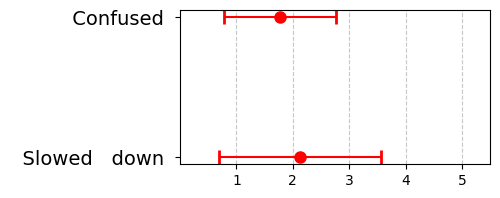

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data

response_lists = [

    [2, 2, 1, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 2, 3, 2, 4, 2, 2, 1, 1, 3, 4, 1, 1, 1],

    [5, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 3, 3, 4, 5, 5, 5],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories   = [' Confused ', '  Slowed   down ']

# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order
plt.xlim(0, 5.5)

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-duringExp-negative.pdf', bbox_inches="tight")


# Show the plot
plt.show()


#### Automatic,

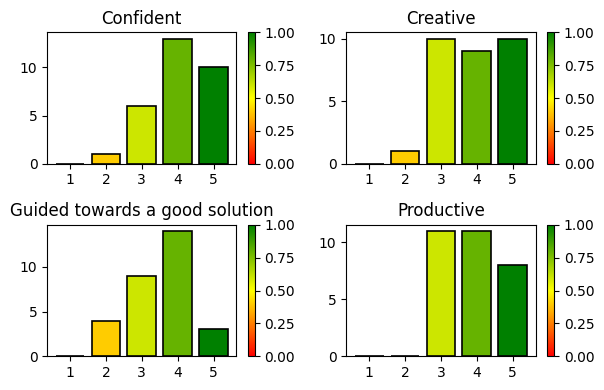

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [
    [3, 4, 3, 3, 5, 3, 4, 5, 4, 5, 4, 5, 4, 5, 3, 4, 4, 4, 3, 5, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5],
    [3, 4, 2, 3, 5, 4, 4, 5, 4, 5, 3, 3, 3, 5, 3, 3, 5, 4, 4, 5, 3, 4, 4, 5, 5, 4, 3, 5, 5, 3],
    [3, 5, 2, 4, 4, 3, 3, 4, 4, 5, 3, 3, 4, 5, 2, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 2, 4, 4, 4, 2],
    [3, 4, 3, 4, 5, 3, 4, 4, 3, 5, 4, 3, 4, 5, 3, 3, 5, 4, 3, 4, 3, 3, 5, 4, 5, 3, 5, 4, 4, 5],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Confident', 'Creative',  'Guided towards a good solution', 'Productive']

# Create a green to red color map
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Confident': cmap_positive,
    'Creative': cmap_positive,
    'Confused': cmap_negative,
    'Guided towards a good solution': cmap_positive,
    'Productive': cmap_positive,
    'Slowed down': cmap_negative
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    response_list = response_lists[i]
    frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]

    # Map colors based on Likert scale value and attribute positivity/negativity
    cmap = cmap_dict[titles[i]]
    bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
    ax.set_title(titles[i])

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-duringExp.pdf')
plt.show()


<ipython-input-93-ba6284350eea>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/s

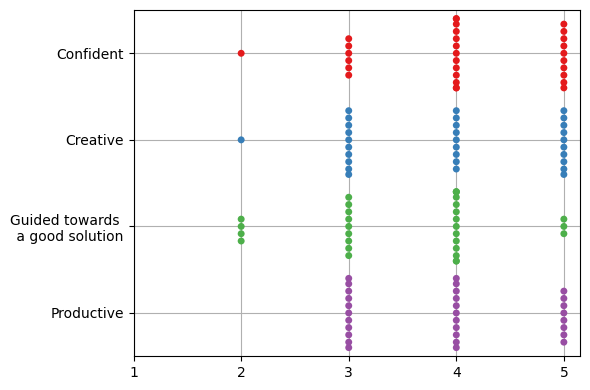

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories = ['Category 1', 'Category 2']
response_lists = [
    [3, 4, 3, 3, 5, 3, 4, 5, 4, 5, 4, 5, 4, 5, 3, 4, 4, 4, 3, 5, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5],
    [3, 4, 2, 3, 5, 4, 4, 5, 4, 5, 3, 3, 3, 5, 3, 3, 5, 4, 4, 5, 3, 4, 4, 5, 5, 4, 3, 5, 5, 3],
    [3, 5, 2, 4, 4, 3, 3, 4, 4, 5, 3, 3, 4, 5, 2, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 2, 4, 4, 4, 2],
    [3, 4, 3, 4, 5, 3, 4, 4, 3, 5, 4, 3, 4, 5, 3, 3, 5, 4, 3, 4, 3, 3, 5, 4, 5, 3, 5, 4, 4, 5],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Confident', 'Creative',  'Guided towards \n a good solution', 'Productive']


# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-duringExp.pdf')
plt.show()

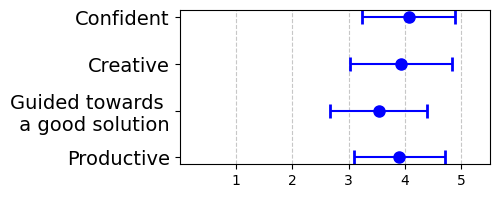

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
response_lists = [
    [3, 4, 3, 3, 5, 3, 4, 5, 4, 5, 4, 5, 4, 5, 3, 4, 4, 4, 3, 5, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5],
    [3, 4, 2, 3, 5, 4, 4, 5, 4, 5, 3, 3, 3, 5, 3, 3, 5, 4, 4, 5, 3, 4, 4, 5, 5, 4, 3, 5, 5, 3],
    [3, 5, 2, 4, 4, 3, 3, 4, 4, 5, 3, 3, 4, 5, 2, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 2, 4, 4, 4, 2],
    [3, 4, 3, 4, 5, 3, 4, 4, 3, 5, 4, 3, 4, 5, 3, 3, 5, 4, 3, 4, 3, 3, 5, 4, 5, 3, 5, 4, 4, 5],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Confident', 'Creative',  'Guided towards \n a good solution', 'Productive']



# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-duringExp.pdf', bbox_inches="tight")

# Show the plot
plt.show()


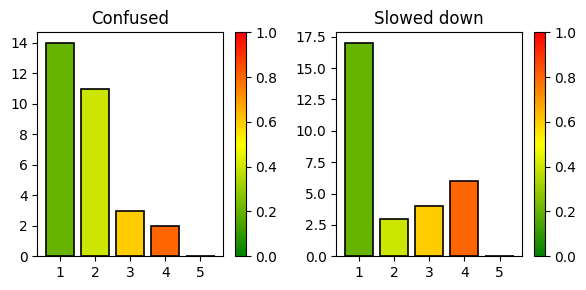

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [

    [4, 2, 2, 1, 1, 1, 1, 4, 2, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1],

    [4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 1, 4, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 4, 1, 4, 4, 3],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = [ 'Confused',  'Slowed down']

# Create a green to red color map
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Confident': cmap_positive,
    'Creative': cmap_positive,
    'Confused': cmap_negative,
    'Guided towards a good solution': cmap_positive,
    'Productive': cmap_positive,
    'Slowed down': cmap_negative
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    response_list = response_lists[i]
    frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]

    # Map colors based on Likert scale value and attribute positivity/negativity
    cmap = cmap_dict[titles[i]]
    bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
    ax.set_title(titles[i])

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-duringExp-negatif.pdf')
plt.show()


<ipython-input-92-c49eb1a5750b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


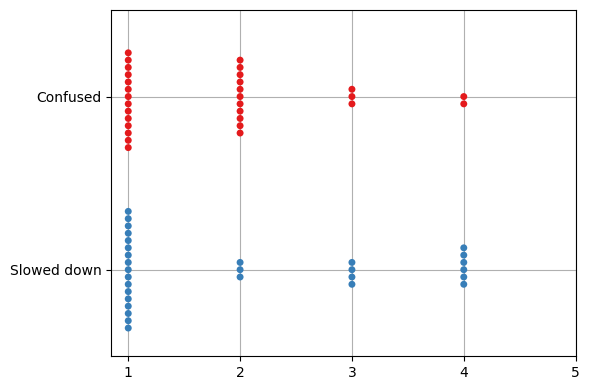

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



response_lists = [

    [4, 2, 2, 1, 1, 1, 1, 4, 2, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1],

    [4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 1, 4, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 4, 1, 4, 4, 3],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = [ 'Confused',  'Slowed down']


# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-duringExp-negatif.pdf')
plt.show()


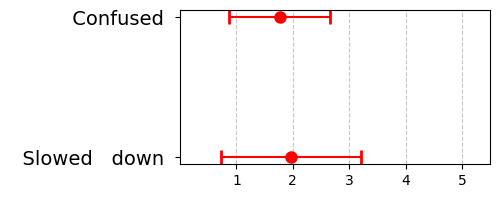

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data

response_lists = [

    [4, 2, 2, 1, 1, 1, 1, 4, 2, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1],

    [4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 1, 4, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 4, 1, 4, 4, 3],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories   = [' Confused ', '  Slowed   down ']


# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-duringExp-negatif.pdf', bbox_inches="tight")

# Show the plot
plt.show()


#I found the tool

 'Easy-to-use',
 'Good fit for the purpose',
 'Intuitive',
 'Slow',
 'Visually appealing'

##### Automatic

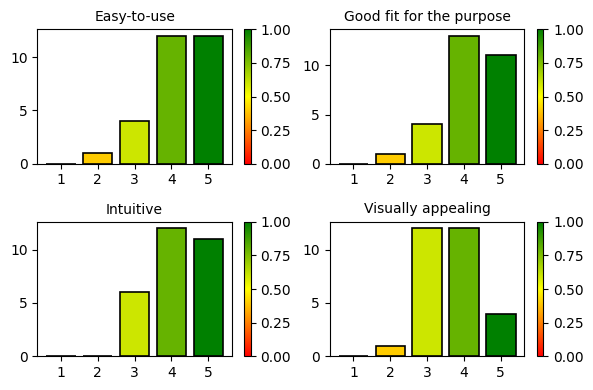

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists  =  [
    [5, 4, 3, 4, 5, 4, 3, 2, 4, 5, 5, 4, 4, 5, 5, 4, 5, 4, 5, 3, 4, 4, 5, 4, 5, 3, 4, 5, 5],
    [5, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 2, 5, 3, 5, 4, 5, 4, 5, 3, 4, 5, 5],
    [5, 4, 3, 4, 4, 4, 3, 4, 3, 4, 5, 4, 3, 5, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 3, 4, 5, 5],
    [4, 3, 3, 4, 4, 3, 3, 3, 2, 5, 4, 3, 3, 4, 3, 4, 4, 3, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 5]
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Easy-to-use', 'Good fit for the purpose', 'Intuitive', 'Visually appealing']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Easy-to-use': cmap_positive,
    'Good fit for the purpose': cmap_positive,
    'Intuitive': cmap_positive,
    'Slow': cmap_negative,
    'Visually appealing': cmap_positive
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i == 5:
        ax.axis('off')
    elif i < 5:
        response_list = response_lists[i]
        frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
        cmap = cmap_dict[titles[i]]
        bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
        ax.set_title(titles[i], fontsize=10)
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)

fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-tool.pdf')
plt.show()



<ipython-input-16-12d9ea8fdbb7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/s

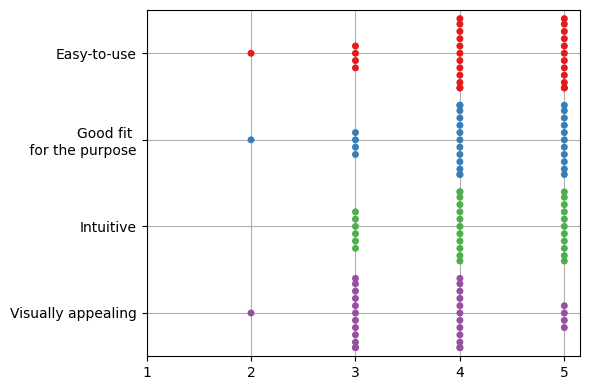

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
response_lists  =  [
    [5, 4, 3, 4, 5, 4, 3, 2, 4, 5, 5, 4, 4, 5, 5, 4, 5, 4, 5, 3, 4, 4, 5, 4, 5, 3, 4, 5, 5],
    [5, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 2, 5, 3, 5, 4, 5, 4, 5, 3, 4, 5, 5],
    [5, 4, 3, 4, 4, 4, 3, 4, 3, 4, 5, 4, 3, 5, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 3, 4, 5, 5],
    [4, 3, 3, 4, 4, 3, 3, 3, 2, 5, 4, 3, 3, 4, 3, 4, 4, 3, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 5]
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Easy-to-use', 'Good fit \n for the purpose', 'Intuitive', 'Visually appealing']


# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-tool.pdf', bbox_inches="tight")
plt.show()


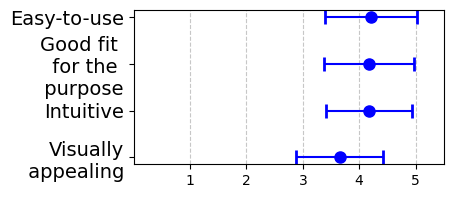

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
response_lists  =  [
    [5, 4, 3, 4, 5, 4, 3, 2, 4, 5, 5, 4, 4, 5, 5, 4, 5, 4, 5, 3, 4, 4, 5, 4, 5, 3, 4, 5, 5],
    [5, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 2, 5, 3, 5, 4, 5, 4, 5, 3, 4, 5, 5],
    [5, 4, 3, 4, 4, 4, 3, 4, 3, 4, 5, 4, 3, 5, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 3, 4, 5, 5],
    [4, 3, 3, 4, 4, 3, 3, 3, 2, 5, 4, 3, 3, 4, 3, 4, 4, 3, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 5]
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Easy-to-use', 'Good fit \n for the \n purpose', 'Intuitive', 'Visually\n appealing']




# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.xlim(0, 5.5)

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-tool.pdf', bbox_inches="tight")

# Show the plot
plt.show()


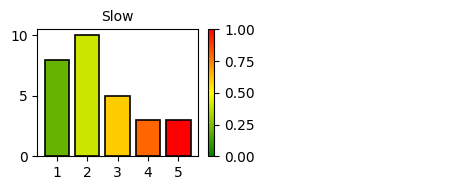

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists  =  [

    [1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 3, 2, 4, 2, 2, 1, 2, 2, 4, 3, 2, 4, 2, 2, 5, 5, 3, 5, 1]

]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = [ 'Slow']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Easy-to-use': cmap_positive,
    'Good fit for the purpose': cmap_positive,
    'Intuitive': cmap_positive,
    'Slow': cmap_negative,
    'Visually appealing': cmap_positive
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(1,2, figsize=(5, 2))
#axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i >0:
        ax.axis('off')
    elif i < 5:
        response_list = response_lists[i]
        frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
        cmap = cmap_dict[titles[i]]
        bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
        ax.set_title(titles[i], fontsize=10)
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)

fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-tool-negatif.pdf')
plt.show()



<ipython-input-90-beb416bed968>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


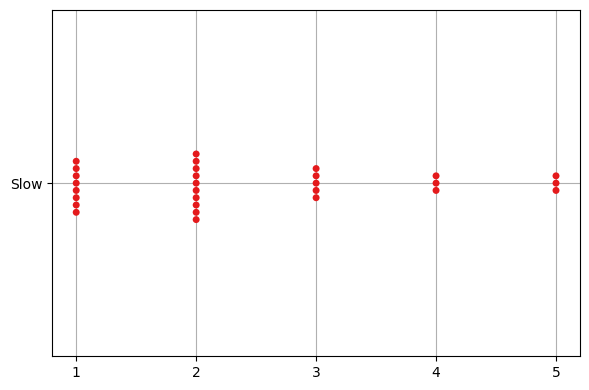

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses

response_lists  =  [

    [1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 3, 2, 4, 2, 2, 1, 2, 2, 4, 3, 2, 4, 2, 2, 5, 5, 3, 5, 1]

]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = [ 'Slow']

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-tool-negatif.pdf')
plt.show()



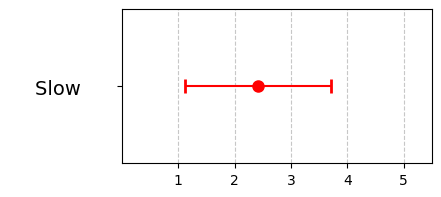

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
response_lists  =  [

    [1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 3, 2, 4, 2, 2, 1, 2, 2, 4, 3, 2, 4, 2, 2, 5, 5, 3, 5, 1]

]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['    Slow     ']



# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-tool-negatif.pdf', bbox_inches="tight")

# Show the plot
plt.show()


#### at End

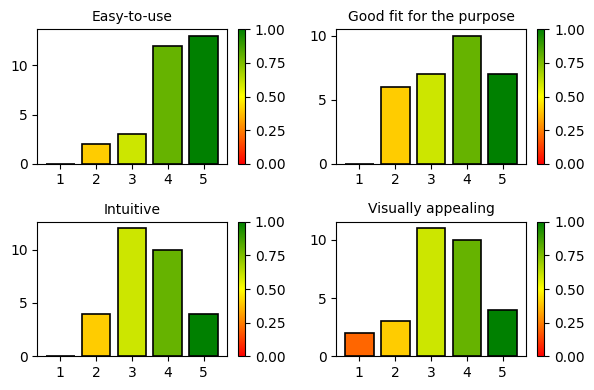

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [
    [5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 2, 3, 5, 3, 5, 3, 4, 2, 5, 5],
    [5, 4, 4, 2, 4, 4, 2, 4, 2, 5, 5, 5, 4, 5, 3, 4, 4, 4, 4, 3, 3, 2, 3, 3, 3, 3, 2, 2, 5, 5],
    [5, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 5, 3, 4, 2, 4, 4, 4, 4, 3, 3, 2, 3, 3, 3, 2, 3, 2, 5, 5],
    [5, 3, 4, 5, 4, 4, 3, 3, 3, 5, 4, 3, 3, 4, 2, 4, 4, 4, 3, 2, 2, 3, 3, 3, 3, 4, 1, 1, 5, 4],
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Easy-to-use', 'Good fit \n for the purpose', 'Intuitive', 'Visually appealing']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Easy-to-use': cmap_positive,
    'Good fit for the purpose': cmap_positive,
    'Intuitive': cmap_positive,
    'Slow': cmap_negative,
    'Visually appealing': cmap_positive
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i == 5:
        ax.axis('off')
    elif i < 5:
        response_list = response_lists[i]
        frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
        cmap = cmap_dict[titles[i]]
        bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
        ax.set_title(titles[i], fontsize=10)
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-tool.pdf')
plt.show()


<ipython-input-89-3ab87a8e0af0>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/

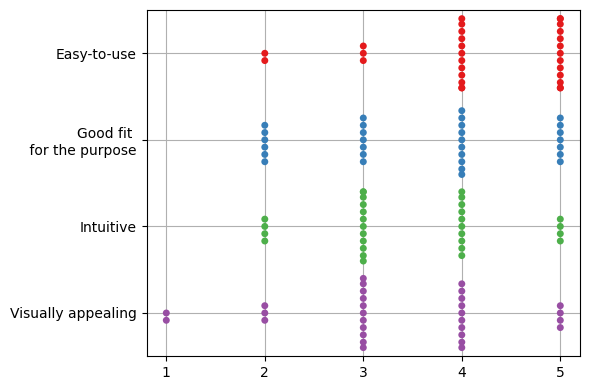

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
response_lists = [
    [5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 2, 3, 5, 3, 5, 3, 4, 2, 5, 5],
    [5, 4, 4, 2, 4, 4, 2, 4, 2, 5, 5, 5, 4, 5, 3, 4, 4, 4, 4, 3, 3, 2, 3, 3, 3, 3, 2, 2, 5, 5],
    [5, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 5, 3, 4, 2, 4, 4, 4, 4, 3, 3, 2, 3, 3, 3, 2, 3, 2, 5, 5],
    [5, 3, 4, 5, 4, 4, 3, 3, 3, 5, 4, 3, 3, 4, 2, 4, 4, 4, 3, 2, 2, 3, 3, 3, 3, 4, 1, 1, 5, 4],
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Easy-to-use', 'Good fit \n for the purpose', 'Intuitive', 'Visually appealing']

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-tool.pdf')
plt.show()

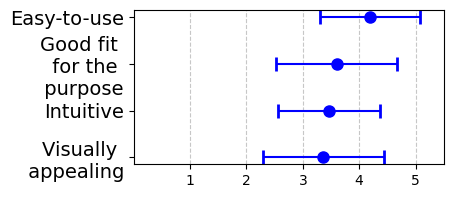

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
response_lists = [
    [5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 2, 3, 5, 3, 5, 3, 4, 2, 5, 5],
    [5, 4, 4, 2, 4, 4, 2, 4, 2, 5, 5, 5, 4, 5, 3, 4, 4, 4, 4, 3, 3, 2, 3, 3, 3, 3, 2, 2, 5, 5],
    [5, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 5, 3, 4, 2, 4, 4, 4, 4, 3, 3, 2, 3, 3, 3, 2, 3, 2, 5, 5],
    [5, 3, 4, 5, 4, 4, 3, 3, 3, 5, 4, 3, 3, 4, 2, 4, 4, 4, 3, 2, 2, 3, 3, 3, 3, 4, 1, 1, 5, 4],
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Easy-to-use', 'Good fit \n for the \n purpose', 'Intuitive', 'Visually \n appealing']



# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-tool.pdf', bbox_inches="tight",dpi=300)


# Show the plot
plt.show()


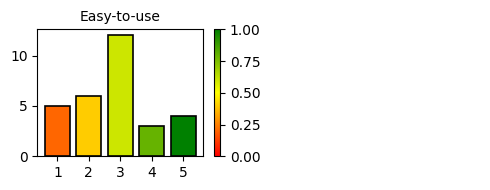

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [

    [3, 2, 1, 3, 2, 3, 2, 3, 3, 1, 3, 2, 3, 1, 5, 1, 5, 1, 2, 3, 4, 2, 3, 3, 3, 3, 4, 5, 5, 4],

]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Slow']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Easy-to-use': cmap_positive,
    'Good fit for the purpose': cmap_positive,
    'Intuitive': cmap_positive,
    'Slow': cmap_negative,
    'Visually appealing': cmap_positive
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(5, 2))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i > 0:
        ax.axis('off')
    elif i < 5:
        response_list = response_lists[i]
        frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
        cmap = cmap_dict[titles[i]]
        bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
        ax.set_title(titles[i], fontsize=10)
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-tool-negatif.pdf')
plt.show()


<ipython-input-104-b0a594188624>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


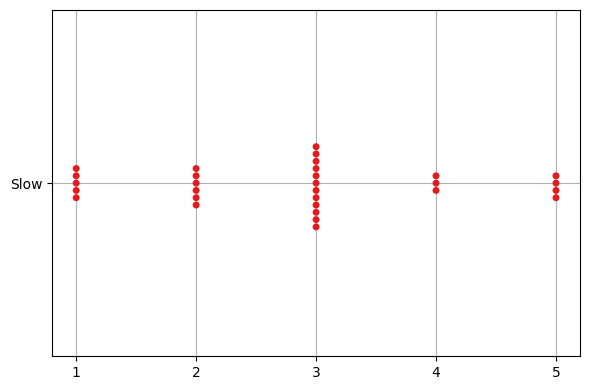

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories = ['Category 1', 'Category 2']
response_lists = [

    [3, 2, 1, 3, 2, 3, 2, 3, 3, 1, 3, 2, 3, 1, 5, 1, 5, 1, 2, 3, 4, 2, 3, 3, 3, 3, 4, 5, 5, 4],

]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Slow']

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-tool-negatif.pdf')
plt.show()


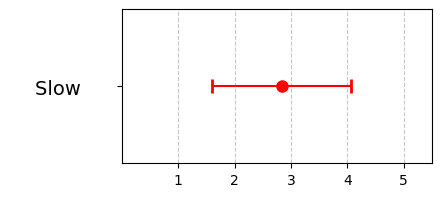

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
response_lists = [

    [3, 2, 1, 3, 2, 3, 2, 3, 3, 1, 3, 2, 3, 1, 5, 1, 5, 1, 2, 3, 4, 2, 3, 3, 3, 3, 4, 5, 5, 4],

]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['    Slow     ']


# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove x-axis label for a cleaner look
plt.xlabel('')

plt.xlim(0, 5.5)

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-tool-negatif.pdf', bbox_inches="tight",dpi=300)

# Show the plot
plt.show()


### On Request

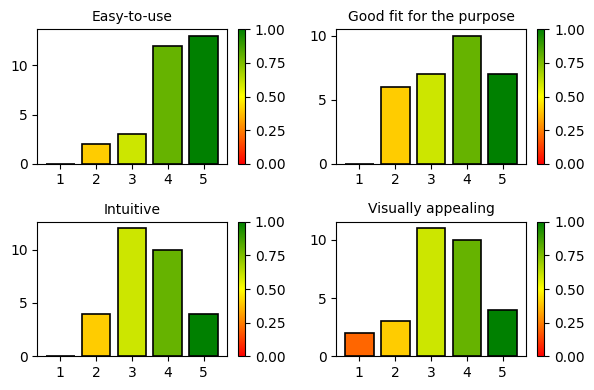

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
transposed_matrix = [
    [5, 4, 3, 4, 5, 4, 2, 4, 4, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5, 3, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5],
    [3, 4, 3, 4, 3, 4, 2, 4, 4, 5, 3, 5, 4, 5, 3, 5, 5, 4, 5, 3, 3, 5, 5, 4, 5, 3, 4, 5, 5, 5],
    [4, 4, 3, 4, 4, 3, 3, 4, 3, 5, 4, 5, 4, 5, 3, 5, 5, 5, 5, 3, 3, 5, 5, 4, 4, 4, 5, 4, 4, 4],
    #[3, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3, 5, 3, 3, 2, 1, 2, 2, 3, 3, 3],
    [3, 4, 3, 4, 5, 3, 3, 3, 2, 5, 4, 4, 3, 4, 3, 5, 4, 5, 3, 3, 2, 3, 4, 3, 5, 4, 4, 4, 4, 5],
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Easy-to-use', 'Good fit for the purpose', 'Intuitive',  'Visually appealing']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Easy-to-use': cmap_positive,
    'Good fit for the purpose': cmap_positive,
    'Intuitive': cmap_positive,
    'Slow': cmap_negative,
    'Visually appealing': cmap_positive
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i == 5:
        ax.axis('off')
    elif i < 5:
        response_list = response_lists[i]
        frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
        cmap = cmap_dict[titles[i]]
        bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
        ax.set_title(titles[i], fontsize=10)
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-tool.pdf')
plt.show()


<ipython-input-102-091547249a54>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/

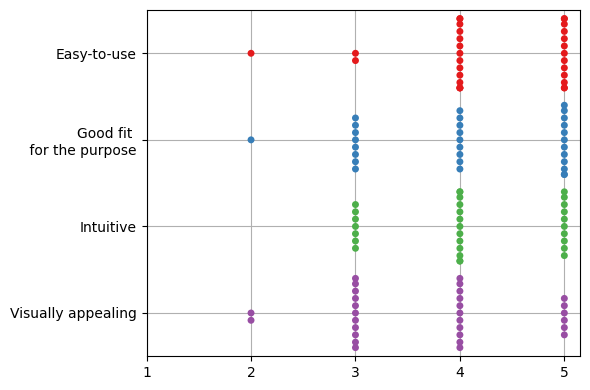

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories = ['Category 1', 'Category 2']

response_lists = [
    [5, 4, 3, 4, 5, 4, 2, 4, 4, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5, 3, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5],
    [3, 4, 3, 4, 3, 4, 2, 4, 4, 5, 3, 5, 4, 5, 3, 5, 5, 4, 5, 3, 3, 5, 5, 4, 5, 3, 4, 5, 5, 5],
    [4, 4, 3, 4, 4, 3, 3, 4, 3, 5, 4, 5, 4, 5, 3, 5, 5, 5, 5, 3, 3, 5, 5, 4, 4, 4, 5, 4, 4, 4],
    #[3, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3, 5, 3, 3, 2, 1, 2, 2, 3, 3, 3],
    [3, 4, 3, 4, 5, 3, 3, 3, 2, 5, 4, 4, 3, 4, 3, 5, 4, 5, 3, 3, 2, 3, 4, 3, 5, 4, 4, 4, 4, 5],
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Easy-to-use', 'Good fit \n for the purpose', 'Intuitive',  'Visually appealing']

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-tool.pdf')
plt.show()


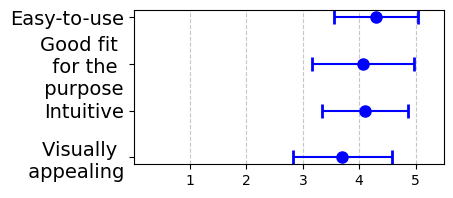

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
response_lists = [
    [5, 4, 3, 4, 5, 4, 2, 4, 4, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5, 3, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5],
    [3, 4, 3, 4, 3, 4, 2, 4, 4, 5, 3, 5, 4, 5, 3, 5, 5, 4, 5, 3, 3, 5, 5, 4, 5, 3, 4, 5, 5, 5],
    [4, 4, 3, 4, 4, 3, 3, 4, 3, 5, 4, 5, 4, 5, 3, 5, 5, 5, 5, 3, 3, 5, 5, 4, 4, 4, 5, 4, 4, 4],
    #[3, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3, 5, 3, 3, 2, 1, 2, 2, 3, 3, 3],
    [3, 4, 3, 4, 5, 3, 3, 3, 2, 5, 4, 4, 3, 4, 3, 5, 4, 5, 3, 3, 2, 3, 4, 3, 5, 4, 4, 4, 4, 5],
]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Easy-to-use', 'Good fit \n for the \n purpose', 'Intuitive', 'Visually \n appealing']


# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-tool.pdf', bbox_inches="tight")


# Show the plot
plt.show()


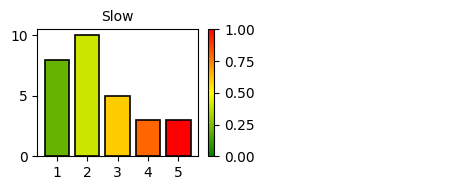

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
transposed_matrix = [

    [3, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3, 5, 3, 3, 2, 1, 2, 2, 3, 3, 3],

]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = [ 'Slow', ]

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
cmap_dict = {
    'Easy-to-use': cmap_positive,
    'Good fit for the purpose': cmap_positive,
    'Intuitive': cmap_positive,
    'Slow': cmap_negative,
    'Visually appealing': cmap_positive
}

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(5, 2))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i > 0:
        ax.axis('off')
    elif i < 5:
        response_list = response_lists[i]
        frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
        cmap = cmap_dict[titles[i]]
        bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
        ax.set_title(titles[i], fontsize=10)
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-tool-negatif.pdf')
plt.show()


<ipython-input-86-597453ab57d8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


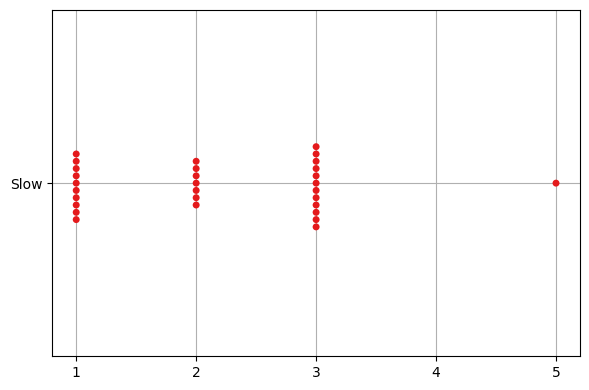

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories  = [ 'Slow', ]

response_lists = [

    [3, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3, 5, 3, 3, 2, 1, 2, 2, 3, 3, 3],

]


# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-tool-negatif.pdf')
plt.show()


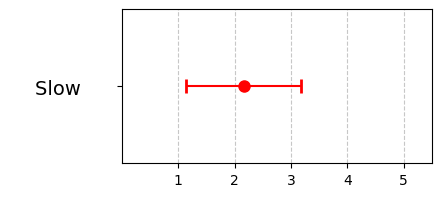

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories = ['    Slow     ']
response_lists = [

    [3, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3, 5, 3, 3, 2, 1, 2, 2, 3, 3, 3],

]



# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-tool-negatif.pdf', bbox_inches="tight")

# Show the plot
plt.show()


#I found the recommendations.
['Complete','Confusing',	 'Correct','Credible'Inconsistent','Intuitive','Stimulating'	,'Useful', 'Well-timed']

##On Request

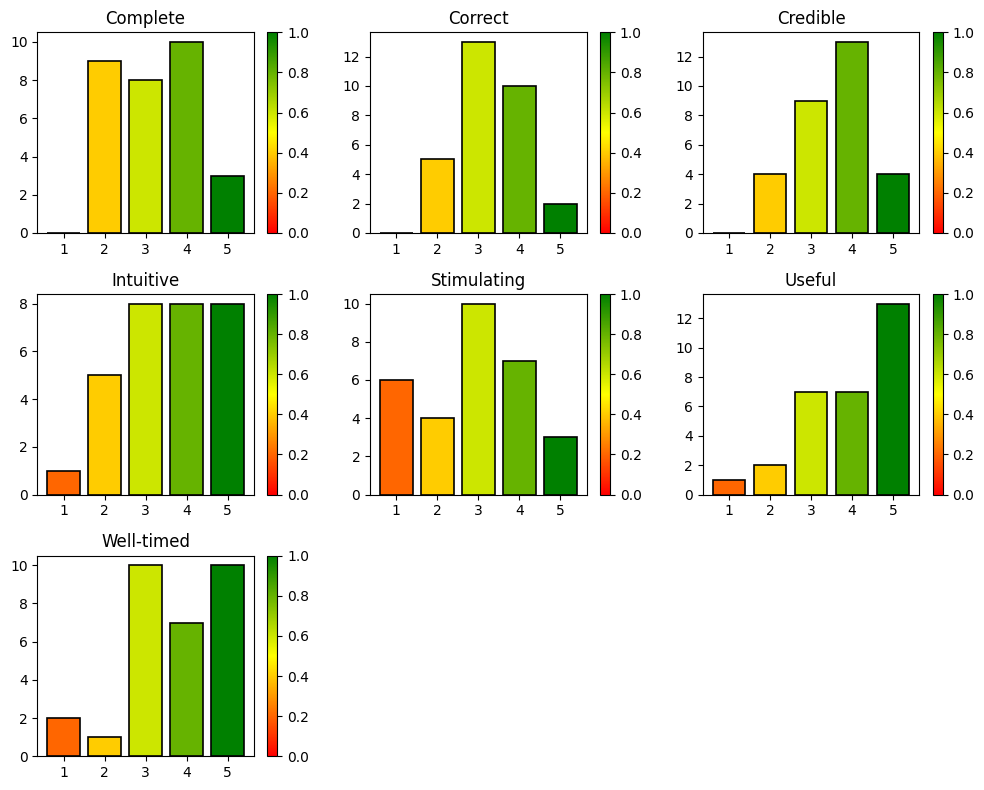

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists  = [
    [3, 4, 2, 3, 4, 4, 2, 2, 4, 2, 5, 4, 3, 5, 2, 3, 5, 3, 3, 2, 2, 2, 4, 3, 4, 3, 2, 4, 4, 4],
    [3, 3, 3, 3, 4, 3, 2, 2, 3, 4, 5, 4, 3, 5, 2, 4, 4, 2, 4, 3, 3, 3, 3, 3, 4, 3, 2, 4, 4, 4],
    [3, 3, 3, 3, 4, 3, 4, 2, 4, 4, 3, 4, 2, 5, 2, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 2, 5, 5, 5],
    [3, 4, 3, 4, 4, 3, 3, 2, 3, 5, 1, 4, 2, 5, 2, 3, 4, 4, 4, 3, 4, 3, 5, 5, 5, 2, 2, 5, 5, 5],
    [3, 5, 2, 3, 5, 3, 2, 2, 2, 4, 1, 5, 3, 4, 1, 3, 4, 4, 4, 3, 4, 3, 1, 3, 1, 3, 4, 3, 1, 1],
    [3, 5, 3, 4, 5, 3, 1, 2, 3, 5, 5, 5, 4, 5, 2, 4, 5, 5, 4, 3, 3, 4, 5, 5, 3, 5, 5, 5, 4, 4],
    [3, 4, 3, 3, 5, 3, 1, 2, 4, 5, 4, 5, 3, 5, 3, 4, 4, 5, 4, 3, 3, 3, 5, 4, 5, 1, 5, 5, 5, 3]
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Stimulating', 'Useful', 'Well-timed']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
positive_attributes = ['Complete', 'Correct', 'Credible', 'Intuitive', 'Stimulating', 'Useful', 'Well-timed']
cmap_dict = {title: cmap_positive if title in positive_attributes else cmap_negative for title in titles}

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i > 6:
        ax.axis('off')
    else:
      response_list = response_lists[i]
      frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
      cmap = cmap_dict[titles[i]]
      bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
      ax.set_title(titles[i], fontsize=12)
      sm = plt.cm.ScalarMappable(cmap=cmap)
      sm.set_array([])
      fig.colorbar(sm, ax=ax)

fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-recommendation.pdf')
plt.show()



<ipython-input-85-fd16d6bb4c46>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/

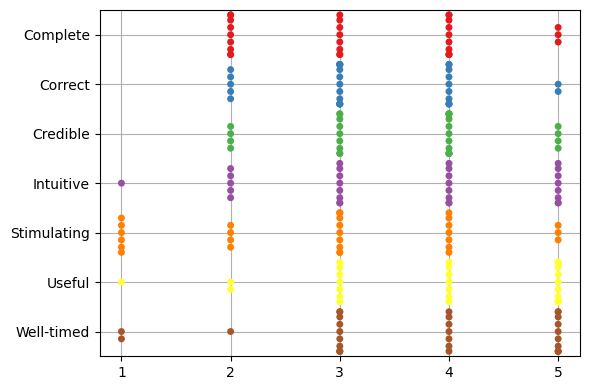

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Stimulating', 'Useful', 'Well-timed']
response_lists  = [
    [3, 4, 2, 3, 4, 4, 2, 2, 4, 2, 5, 4, 3, 5, 2, 3, 5, 3, 3, 2, 2, 2, 4, 3, 4, 3, 2, 4, 4, 4],
    [3, 3, 3, 3, 4, 3, 2, 2, 3, 4, 5, 4, 3, 5, 2, 4, 4, 2, 4, 3, 3, 3, 3, 3, 4, 3, 2, 4, 4, 4],
    [3, 3, 3, 3, 4, 3, 4, 2, 4, 4, 3, 4, 2, 5, 2, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 2, 5, 5, 5],
    [3, 4, 3, 4, 4, 3, 3, 2, 3, 5, 1, 4, 2, 5, 2, 3, 4, 4, 4, 3, 4, 3, 5, 5, 5, 2, 2, 5, 5, 5],
    [3, 5, 2, 3, 5, 3, 2, 2, 2, 4, 1, 5, 3, 4, 1, 3, 4, 4, 4, 3, 4, 3, 1, 3, 1, 3, 4, 3, 1, 1],
    [3, 5, 3, 4, 5, 3, 1, 2, 3, 5, 5, 5, 4, 5, 2, 4, 5, 5, 4, 3, 3, 4, 5, 5, 3, 5, 5, 5, 4, 4],
    [3, 4, 3, 3, 5, 3, 1, 2, 4, 5, 4, 5, 3, 5, 3, 4, 4, 5, 4, 3, 3, 3, 5, 4, 5, 1, 5, 5, 5, 3]
]


# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-recommendation.pdf')
plt.show()



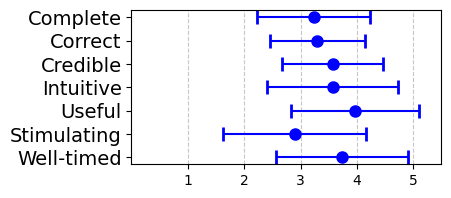

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories = ['Complete',  'Correct', 'Credible',  'Intuitive',  'Useful', 'Stimulating','Well-timed']
response_lists  = [
    [3, 4, 2, 3, 4, 4, 2, 2, 4, 2, 5, 4, 3, 5, 2, 3, 5, 3, 3, 2, 2, 2, 4, 3, 4, 3, 2, 4, 4, 4],
    [3, 3, 3, 3, 4, 3, 2, 2, 3, 4, 5, 4, 3, 5, 2, 4, 4, 2, 4, 3, 3, 3, 3, 3, 4, 3, 2, 4, 4, 4],
    [3, 3, 3, 3, 4, 3, 4, 2, 4, 4, 3, 4, 2, 5, 2, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 2, 5, 5, 5],
    [3, 4, 3, 4, 4, 3, 3, 2, 3, 5, 1, 4, 2, 5, 2, 3, 4, 4, 4, 3, 4, 3, 5, 5, 5, 2, 2, 5, 5, 5],
    [3, 5, 3, 4, 5, 3, 1, 2, 3, 5, 5, 5, 4, 5, 2, 4, 5, 5, 4, 3, 3, 4, 5, 5, 3, 5, 5, 5, 4, 4],
        [3, 5, 2, 3, 5, 3, 2, 2, 2, 4, 1, 5, 3, 4, 1, 3, 4, 4, 4, 3, 4, 3, 1, 3, 1, 3, 4, 3, 1, 1],
    [3, 4, 3, 3, 5, 3, 1, 2, 4, 5, 4, 5, 3, 5, 3, 4, 4, 5, 4, 3, 3, 3, 5, 4, 5, 1, 5, 5, 5, 3]
]



# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.xlim(0, 5.5)

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-recommendation.pdf', bbox_inches="tight")


# Show the plot
plt.show()


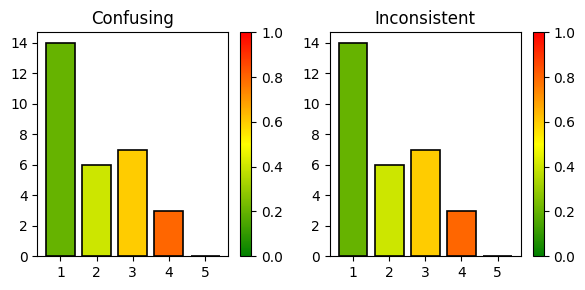

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists  = [

    [4, 1, 2, 1, 1, 1, 1, 4, 3, 3, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3, 2, 1, 2, 1, 2, 4, 1, 3, 3],

    [4, 2, 2, 1, 1, 1, 1, 4, 2, 3, 1, 1, 3, 1, 4, 1, 2, 2, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 1, 1],

]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = [ 'Confusing',  'Inconsistent',]

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
positive_attributes = ['Complete', 'Correct', 'Credible', 'Intuitive', 'Stimulating', 'Useful', 'Well-timed']
cmap_dict = {title: cmap_positive if title in positive_attributes else cmap_negative for title in titles}

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    response_list = response_lists[i]
    frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
    cmap = cmap_dict[titles[i]]
    bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
    ax.set_title(titles[i], fontsize=12)
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-recommendation-negatif.pdf')
plt.show()



<ipython-input-84-15ecfe4ad292>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


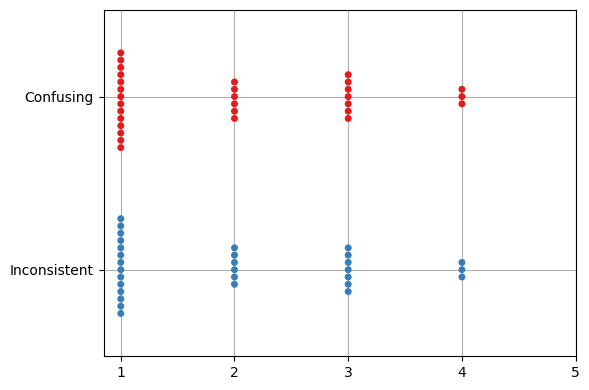

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories = [ 'Confusing',  'Inconsistent',]
response_lists  = [

    [4, 1, 2, 1, 1, 1, 1, 4, 3, 3, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3, 2, 1, 2, 1, 2, 4, 1, 3, 3],

    [4, 2, 2, 1, 1, 1, 1, 4, 2, 3, 1, 1, 3, 1, 4, 1, 2, 2, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 1, 1],

]

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-recommendation-negatif.pdf')
plt.show()

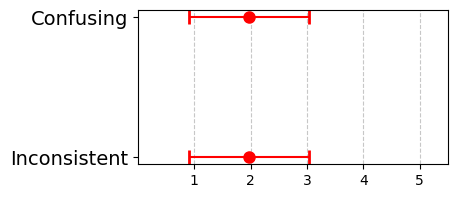

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories = [ 'Confusing',  'Inconsistent',]
response_lists  = [

    [4, 1, 2, 1, 1, 1, 1, 4, 3, 3, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3, 2, 1, 2, 1, 2, 4, 1, 3, 3],

    [4, 2, 2, 1, 1, 1, 1, 4, 2, 3, 1, 1, 3, 1, 4, 1, 2, 2, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 1, 1],

]


# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.xlim(0, 5.5)

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/onRequest-recommendation-negatif.pdf', bbox_inches="tight")

# Show the plot
plt.show()


## At end

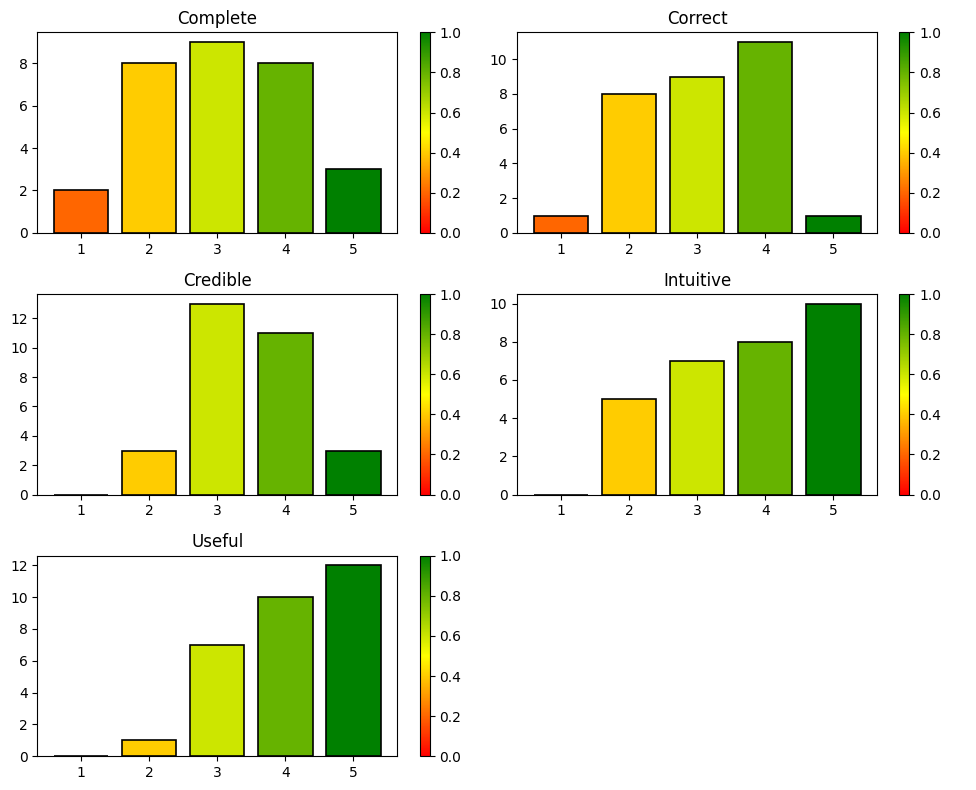

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [
    [5, 3, 3, 2, 3, 3, 2, 4, 3, 2, 2, 4, 4, 5, 2, 3, 5, 2, 4, 2, 1, 2, 3, 3, 4, 4, 4, 1, 3, 4],

    [4, 3, 3, 3, 4, 3, 3, 3, 2, 4, 2, 4, 4, 5, 1, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 3, 3, 3],
    [4, 3, 3, 3, 4, 3, 4, 3, 2, 4, 2, 4, 3, 5, 3, 2, 4, 3, 4, 3, 3, 3, 3, 5, 4, 4, 4, 3, 5, 4],

    [5, 4, 2, 3, 5, 2, 3, 5, 2, 3, 4, 5, 3, 5, 2, 4, 4, 4, 4, 2, 4, 3, 5, 5, 3, 3, 4, 5, 5, 5],
    [5, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 5, 5, 5, 3, 4, 5, 4, 4, 2, 5, 3, 5, 5, 3, 3, 5, 4, 5, 5],
]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Useful']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
positive_attributes = ['Complete', 'Correct', 'Credible', 'Intuitive', 'Useful']
cmap_dict = {title: cmap_positive if title in positive_attributes else cmap_negative for title in titles}

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i > 4:
        ax.axis('off')
    elif i < 7:
        response_list = response_lists[i]
        frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
        cmap = cmap_dict[titles[i]]
        bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
        ax.set_title(titles[i], fontsize=12)
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)

fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-recommendation.pdf')
plt.show()


<ipython-input-83-dba73511335f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/

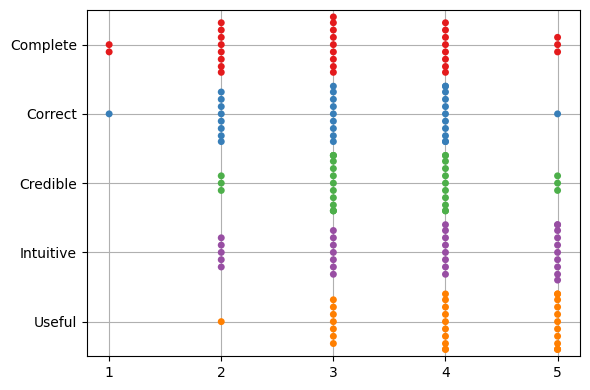

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Useful']
response_lists = [
    [5, 3, 3, 2, 3, 3, 2, 4, 3, 2, 2, 4, 4, 5, 2, 3, 5, 2, 4, 2, 1, 2, 3, 3, 4, 4, 4, 1, 3, 4],

    [4, 3, 3, 3, 4, 3, 3, 3, 2, 4, 2, 4, 4, 5, 1, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 3, 3, 3],
    [4, 3, 3, 3, 4, 3, 4, 3, 2, 4, 2, 4, 3, 5, 3, 2, 4, 3, 4, 3, 3, 3, 3, 5, 4, 4, 4, 3, 5, 4],

    [5, 4, 2, 3, 5, 2, 3, 5, 2, 3, 4, 5, 3, 5, 2, 4, 4, 4, 4, 2, 4, 3, 5, 5, 3, 3, 4, 5, 5, 5],
    [5, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 5, 5, 5, 3, 4, 5, 4, 4, 2, 5, 3, 5, 5, 3, 3, 5, 4, 5, 5],
]




# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-recommendation.pdf')
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/usr/lo

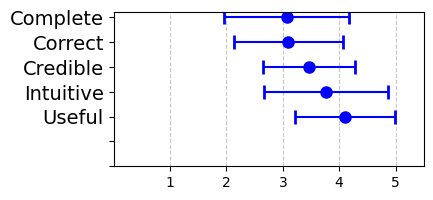

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Useful','','']
response_lists = [
    [5, 3, 3, 2, 3, 3, 2, 4, 3, 2, 2, 4, 4, 5, 2, 3, 5, 2, 4, 2, 1, 2, 3, 3, 4, 4, 4, 1, 3, 4],

    [4, 3, 3, 3, 4, 3, 3, 3, 2, 4, 2, 4, 4, 5, 1, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 3, 3, 3],
    [4, 3, 3, 3, 4, 3, 4, 3, 2, 4, 2, 4, 3, 5, 3, 2, 4, 3, 4, 3, 3, 3, 3, 5, 4, 4, 4, 3, 5, 4],

    [5, 4, 2, 3, 5, 2, 3, 5, 2, 3, 4, 5, 3, 5, 2, 4, 4, 4, 4, 2, 4, 3, 5, 5, 3, 3, 4, 5, 5, 5],
    [5, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 5, 5, 5, 3, 4, 5, 4, 4, 2, 5, 3, 5, 5, 3, 3, 5, 4, 5, 5],
    [],
    []
]



# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.xlim(0, 5.5)

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-recommendation.pdf', bbox_inches="tight")


# Show the plot
plt.show()


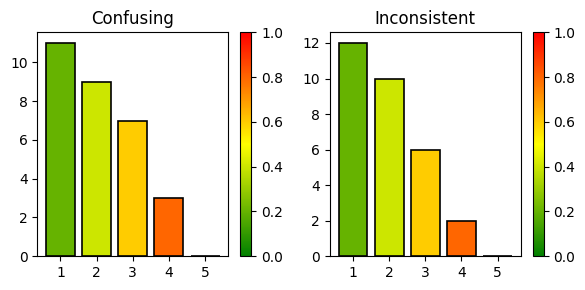

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [

    [1, 2, 2, 3, 2, 1, 1, 1, 4, 3, 4, 2, 2, 1, 3, 1, 2, 1, 3, 1, 2, 4, 1, 1, 1, 3, 2, 3, 3, 2],

    [1, 3, 1, 1, 2, 1, 1, 2, 3, 2, 4, 2, 1, 1, 3, 1, 3, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 4, 1]

]



# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = [ 'Confusing', 'Inconsistent']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
positive_attributes = ['Complete', 'Correct', 'Credible', 'Intuitive', 'Useful']
cmap_dict = {title: cmap_positive if title in positive_attributes else cmap_negative for title in titles}

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i > 6:
        ax.axis('off')
    elif i < 7:
        response_list = response_lists[i]
        frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
        cmap = cmap_dict[titles[i]]
        bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
        ax.set_title(titles[i], fontsize=12)
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax)

fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-recommendation-negatif.pdf')
plt.show()


<ipython-input-82-2212b500a57f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


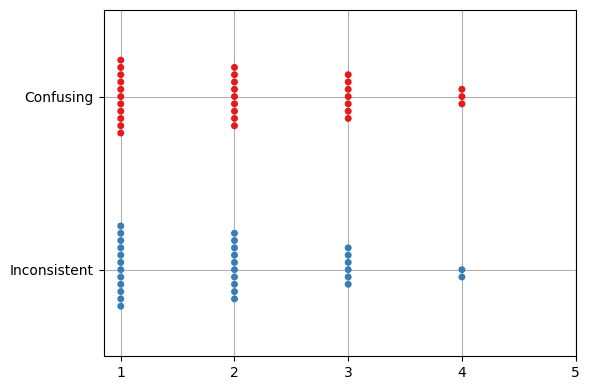

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories  = [ 'Confusing', 'Inconsistent']
response_lists = [

    [1, 2, 2, 3, 2, 1, 1, 1, 4, 3, 4, 2, 2, 1, 3, 1, 2, 1, 3, 1, 2, 4, 1, 1, 1, 3, 2, 3, 3, 2],

    [1, 3, 1, 1, 2, 1, 1, 2, 3, 2, 4, 2, 1, 1, 3, 1, 3, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 4, 1]

]


# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-recommendation-negatif.pdf')
plt.show()


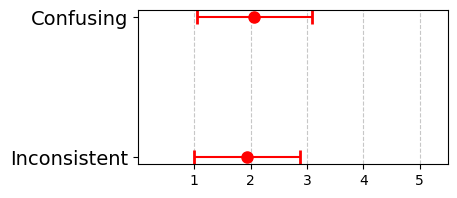

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories  = [ 'Confusing', 'Inconsistent']
response_lists = [

    [1, 2, 2, 3, 2, 1, 1, 1, 4, 3, 4, 2, 2, 1, 3, 1, 2, 1, 3, 1, 2, 4, 1, 1, 1, 3, 2, 3, 3, 2],

    [1, 3, 1, 1, 2, 1, 1, 2, 3, 2, 4, 2, 1, 1, 3, 1, 3, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 4, 1]

]



# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.xlim(0, 5.5)

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/atEnd-recommendation-negatif.pdf', bbox_inches="tight")

# Show the plot
plt.show()


## Automatic

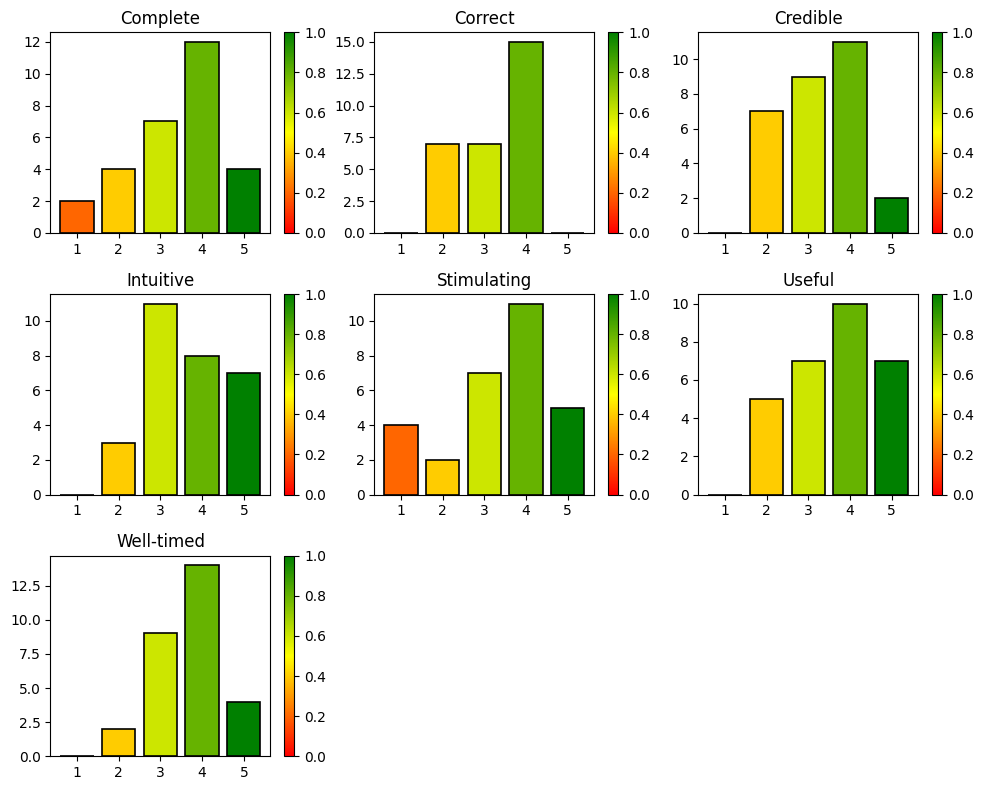

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [
    [5, 3, 3, 2, 4, 4, 3, 4, 3, 1, 2, 4, 4, 5, 4, 2, 4, 1, 5, 3, 3, 2, 4, 3, 5, 4, 4, 4, 4],
    [4, 4, 3, 2, 4, 2, 3, 4, 3, 2, 2, 4, 3, 4, 4, 2, 4, 2, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3, 4],
    [4, 3, 3, 2, 4, 3, 4, 4, 3, 2, 2, 4, 2, 4, 4, 2, 3, 3, 4, 3, 3, 2, 5, 4, 5, 4, 3, 2, 4],
    [5, 4, 2, 3, 2, 3, 3, 4, 3, 4, 3, 4, 3, 5, 3, 3, 5, 3, 4, 3, 4, 2, 5, 5, 5, 4, 3, 4, 5],
    [4, 5, 4, 1, 4, 3, 2, 4, 4, 4, 1, 5, 3, 5, 4, 2, 4, 1, 4, 5, 4, 1, 5, 3, 3, 4, 3, 3, 3],
    [4, 4, 4, 3, 4, 3, 3, 4, 2, 4, 2, 5, 4, 5, 3, 2, 5, 2, 4, 3, 3, 2, 5, 5, 5, 4, 4, 3, 5],
    [5, 4, 4, 3, 5, 3, 4, 4, 3, 4, 2, 5, 3, 4, 2, 4, 4, 3, 4, 3, 3, 4, 5, 4, 3, 4, 4, 3, 4]
]

# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Stimulating', 'Useful', 'Well-timed']

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
positive_attributes = ['Complete', 'Correct', 'Credible', 'Intuitive', 'Stimulating', 'Useful', 'Well-timed']
cmap_dict = {title: cmap_positive if title in positive_attributes else cmap_negative for title in titles}

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    if i > 6:
        ax.axis('off')
    elif i < 7:
      response_list = response_lists[i]
      frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
      cmap = cmap_dict[titles[i]]
      bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
      ax.set_title(titles[i], fontsize=12)
      sm = plt.cm.ScalarMappable(cmap=cmap)
      sm.set_array([])
      fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-recommendation.pdf')
plt.show()


<ipython-input-81-81644bd949e4>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/

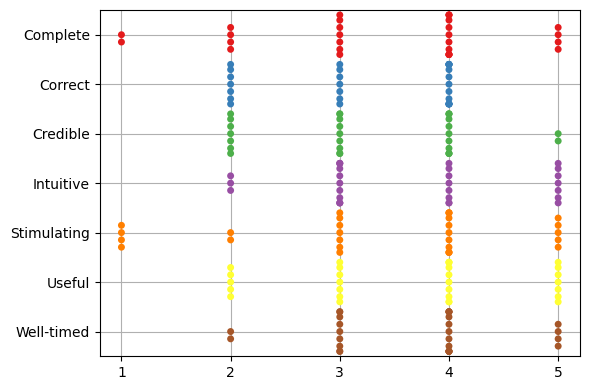

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
response_lists = [
    [5, 3, 3, 2, 4, 4, 3, 4, 3, 1, 2, 4, 4, 5, 4, 2, 4, 1, 5, 3, 3, 2, 4, 3, 5, 4, 4, 4, 4],
    [4, 4, 3, 2, 4, 2, 3, 4, 3, 2, 2, 4, 3, 4, 4, 2, 4, 2, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3, 4],
    [4, 3, 3, 2, 4, 3, 4, 4, 3, 2, 2, 4, 2, 4, 4, 2, 3, 3, 4, 3, 3, 2, 5, 4, 5, 4, 3, 2, 4],
    [5, 4, 2, 3, 2, 3, 3, 4, 3, 4, 3, 4, 3, 5, 3, 3, 5, 3, 4, 3, 4, 2, 5, 5, 5, 4, 3, 4, 5],
    [4, 5, 4, 1, 4, 3, 2, 4, 4, 4, 1, 5, 3, 5, 4, 2, 4, 1, 4, 5, 4, 1, 5, 3, 3, 4, 3, 3, 3],
    [4, 4, 4, 3, 4, 3, 3, 4, 2, 4, 2, 5, 4, 5, 3, 2, 5, 2, 4, 3, 3, 2, 5, 5, 5, 4, 4, 3, 5],
    [5, 4, 4, 3, 5, 3, 4, 4, 3, 4, 2, 5, 3, 4, 2, 4, 4, 3, 4, 3, 3, 4, 5, 4, 3, 4, 4, 3, 4]
]

# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Stimulating', 'Useful', 'Well-timed']


# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-recommendation.pdf')
plt.show()


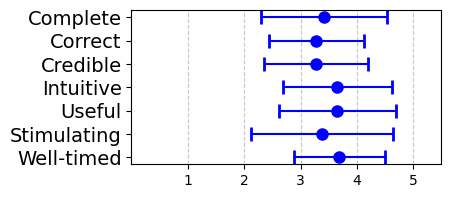

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
response_lists = [
    [5, 3, 3, 2, 4, 4, 3, 4, 3, 1, 2, 4, 4, 5, 4, 2, 4, 1, 5, 3, 3, 2, 4, 3, 5, 4, 4, 4, 4],
    [4, 4, 3, 2, 4, 2, 3, 4, 3, 2, 2, 4, 3, 4, 4, 2, 4, 2, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3, 4],
    [4, 3, 3, 2, 4, 3, 4, 4, 3, 2, 2, 4, 2, 4, 4, 2, 3, 3, 4, 3, 3, 2, 5, 4, 5, 4, 3, 2, 4],
    [5, 4, 2, 3, 2, 3, 3, 4, 3, 4, 3, 4, 3, 5, 3, 3, 5, 3, 4, 3, 4, 2, 5, 5, 5, 4, 3, 4, 5],

    [4, 4, 4, 3, 4, 3, 3, 4, 2, 4, 2, 5, 4, 5, 3, 2, 5, 2, 4, 3, 3, 2, 5, 5, 5, 4, 4, 3, 5],

    [4, 5, 4, 1, 4, 3, 2, 4, 4, 4, 1, 5, 3, 5, 4, 2, 4, 1, 4, 5, 4, 1, 5, 3, 3, 4, 3, 3, 3],
    [5, 4, 4, 3, 5, 3, 4, 4, 3, 4, 2, 5, 3, 4, 2, 4, 4, 3, 4, 3, 3, 4, 5, 4, 3, 4, 4, 3, 4]
]

# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
categories = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Stimulating', 'Useful', 'Well-timed']
categories = ['Complete',  'Correct', 'Credible',  'Intuitive', 'Useful','Stimulating',  'Well-timed']




# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='blue', ecolor='blue', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='blue', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-recommendation.pdf', bbox_inches="tight")


# Show the plot
plt.show()


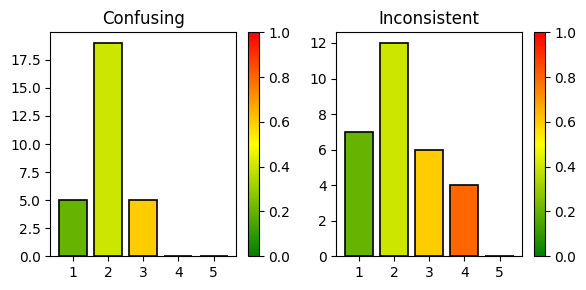

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# List of Likert scale response lists
response_lists = [

    [2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 1],

    [2, 2, 1, 1, 1, 1, 1, 2, 4, 3, 4, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 4, 1, 2, 1, 2, 4, 3, 2],

]

# Likert scale labels and titles
likert_scale_labels = ['1', '2', '3', '4', '5']
titles = [ 'Confusing',  'Inconsistent', ]

# Create green to red and red to green color maps
colors_positive = ["red", "yellow", "green"]
colors_negative = ["green", "yellow", "red"]
nodes = [0.0, 0.5, 1.0]
cmap_positive = LinearSegmentedColormap.from_list("red_to_green", list(zip(nodes, colors_positive)))
cmap_negative = LinearSegmentedColormap.from_list("green_to_red", list(zip(nodes, colors_negative)))

# Determine the appropriate colormap for each title
positive_attributes = ['Complete', 'Correct', 'Credible', 'Intuitive', 'Stimulating', 'Useful', 'Well-timed']
cmap_dict = {title: cmap_positive if title in positive_attributes else cmap_negative for title in titles}

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate a plot for each set of Likert scale responses
for i, ax in enumerate(axes):
    response_list = response_lists[i]
    frequency_counts = [Counter(response_list)[j] for j in range(1, len(likert_scale_labels) + 1)]
    cmap = cmap_dict[titles[i]]
    bars = ax.bar(likert_scale_labels, frequency_counts, color=[cmap(int(label)/5) for label in likert_scale_labels], edgecolor='black', linewidth=1.2)
    ax.set_title(titles[i], fontsize=12)
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

# Adjust spacing between subplots
fig.tight_layout()
#fig.suptitle('During the experiment, I felt... ')
# Display the plots
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-recommendation-negatif.pdf')
plt.show()


<ipython-input-100-7682a88f1346>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")


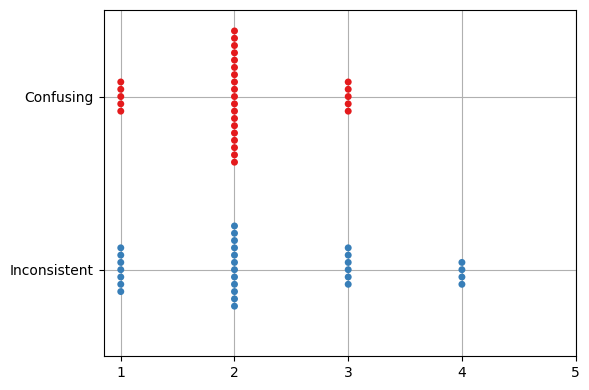

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categories and responses
categories = [ 'Confusing',  'Inconsistent']
response_lists = [

    [2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 1],

    [2, 2, 1, 1, 1, 1, 1, 2, 4, 3, 4, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 4, 1, 2, 1, 2, 4, 3, 2],

]

# Convert the lists to a DataFrame
data = pd.DataFrame(response_lists).T
data.columns = categories

# Melting the DataFrame to get it in the long-form for the swarmplot
data_melted = data.melt(var_name='Category', value_name='Response')

# Creating the swarmplot with reversed axes
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data_melted, y='Category', x='Response', palette="Set1")

# Set the x-ticks to show only integer values
plt.xticks(range(1, 6))  # This specifies the ticks at 1, 2, 3, 4, 5
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # To prevent overlap of labels and the plot
plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-recommendation-negatif.pdf')
plt.show()

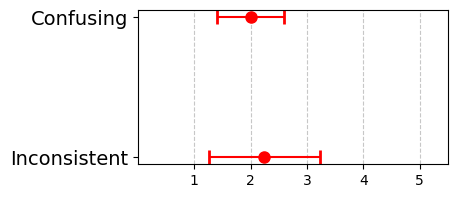

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
categories = [ 'Confusing',  'Inconsistent']
response_lists = [

    [2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 1],

    [2, 2, 1, 1, 1, 1, 1, 2, 4, 3, 4, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 4, 1, 2, 1, 2, 4, 3, 2],

]


# Calculate statistics: mean and standard deviation
means = [np.mean(responses) for responses in response_lists]
stds = [np.std(responses, ddof=1) for responses in response_lists]  # Use ddof=1 for sample std deviation

# Create the plot with a more compact figure size
plt.figure(figsize=(4, 2))  # Adjust figure size here as needed

# Define colors for each category


# Plot the means as points and the standard deviations as error bars
for i, category in enumerate(categories):
    plt.errorbar(means[i], i, xerr=stds[i], fmt='o', color='red', ecolor='red', capsize=5, capthick=2, markersize=8)

    # Add horizontal lines representing the -1σ and +1σ range, adjust line width (lw) as needed
    #plt.hlines(i, means[i] - stds[i], means[i] + stds[i], color='red', alpha=0.5, lw=10)

# Customizing the plot
plt.yticks(range(len(categories)), categories,  fontsize=14)
plt.xticks(range(1, 6))  # Set x-ticks to only show integer values
plt.gca().invert_yaxis()  # Invert y-axis to match the provided example's order

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 5.5)

# Remove x-axis label for a cleaner look
plt.xlabel('')

plt.savefig('/content/gdrive/MyDrive/experiments Malaga/Results/automatic-recommendation-negatif.pdf', bbox_inches="tight")

# Show the plot
plt.show()
